In [1]:
import numpy as np
import os
import skimage.io as skio
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
patches_path = os.path.join(indir, "patches")

In [2]:
# read all of the .npy arrays in the folder into a single array
patches = []

for file in os.listdir(patches_path):
    if file.endswith(".npy"):
        patches.append(np.load(os.path.join(patches_path, file)))

In [3]:
# concatenate all of the arrays into a single array
patches = np.concatenate(patches)

In [4]:
# print the values in the array Index: 26575
print(patches[26575])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Index: 9178


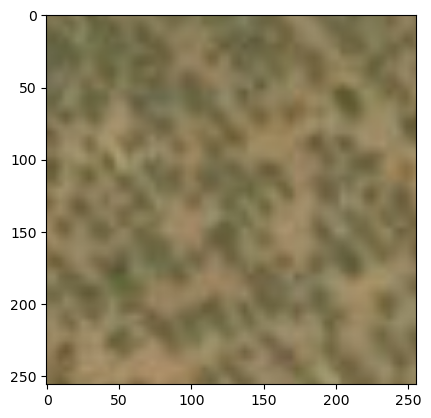

Index: 32019


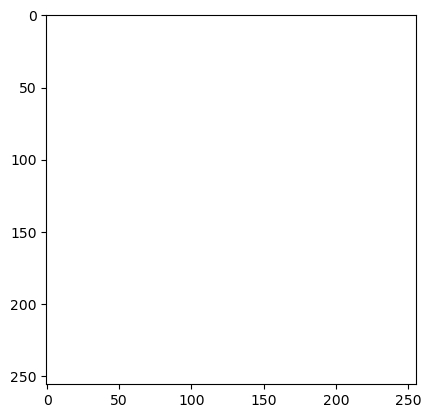

Index: 10115


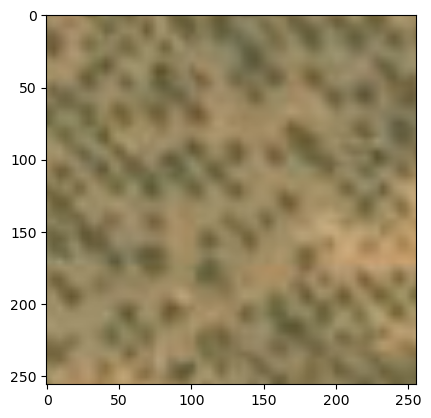

Index: 16554


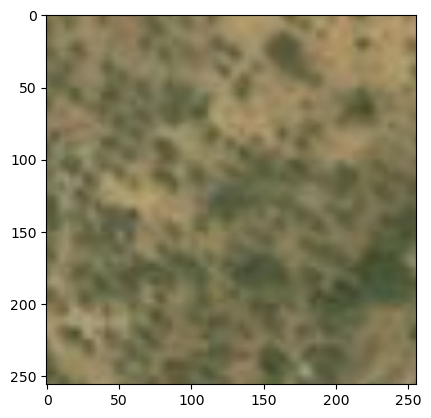

Index: 16613


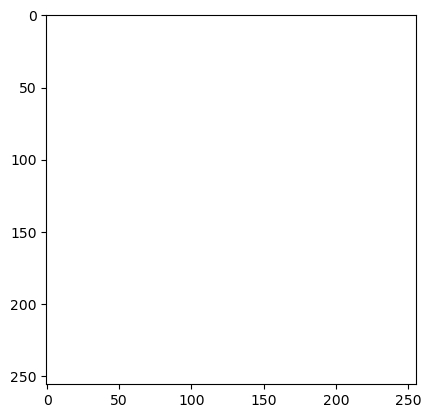

In [5]:
# print 5 random patches along with their indices
for i in range(5):
    index = np.random.randint(0, len(patches))
    print(f"Index: {index}")
    plt.imshow(patches[index])
    plt.show()

In [6]:
patches.shape

(34558, 256, 256, 3)

In [7]:
import numpy as np

# Calculate the percentage of zero-valued pixels in each image
zero_pixels = (patches == 255).sum(axis=(1, 2, 3))
total_pixels = patches.shape[1] * patches.shape[2] * patches.shape[3]
zero_percentages = zero_pixels / total_pixels

# Set the threshold for filtering images
threshold = 0.9

# Find indices of images with less than 90% zero-valued pixels
valid_indices = np.where(zero_percentages < threshold)[0]

# Filter the array based on valid_indices
filtered_patches = patches[valid_indices]

print("Original array shape:", patches.shape)
print("Filtered array shape:", filtered_patches.shape)

Original array shape: (34558, 256, 256, 3)
Filtered array shape: (12500, 256, 256, 3)


Index: 2162


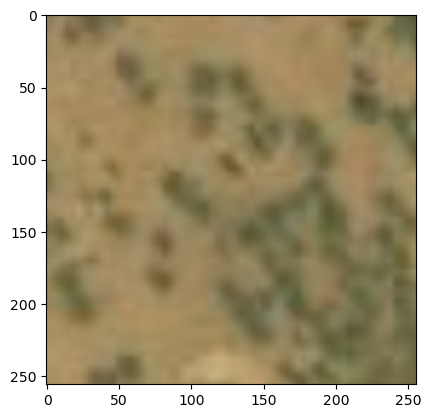

Index: 6098


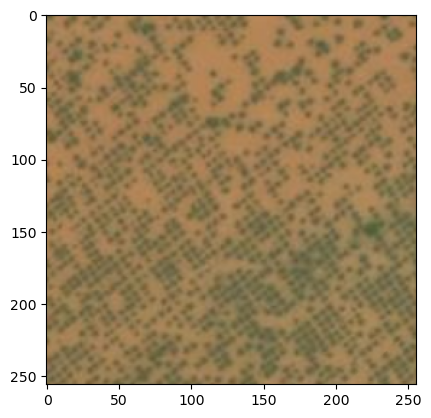

Index: 8385


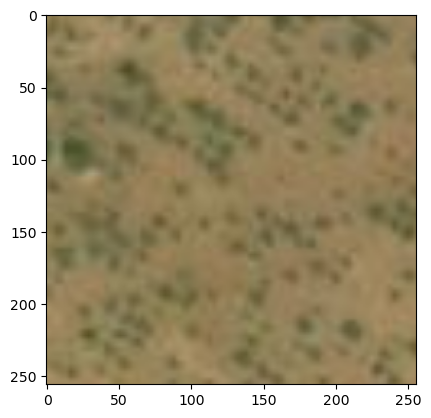

Index: 4980


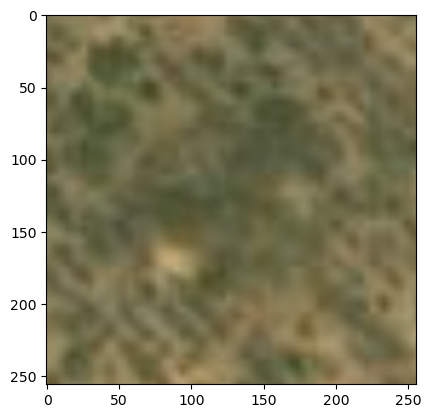

Index: 11190


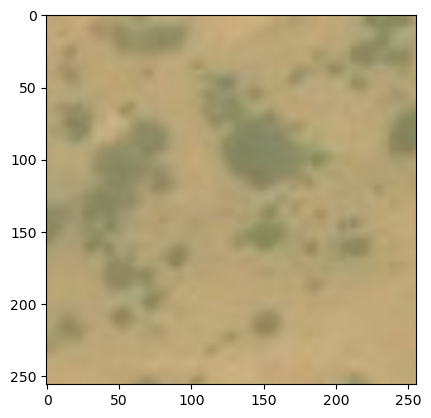

In [8]:
import numpy as np

# assuming your array is called "patches"
num_patches = patches.shape[0]

# calculate proportion of zero pixels in each patch
prop_zero = np.sum(np.all(patches == 0, axis=(1, 2, 3)), axis=1) / (patches.shape[1] * patches.shape[2] * patches.shape[3])

# create a boolean mask to select patches with less than 90% zero pixels
mask = prop_zero < 0.9

# apply the mask to the patches array
filtered_patches = patches[mask]

# print the number of patches remaining after filtering
num_filtered = filtered_patches.shape[0]
print(f"Filtered {num_patches - num_filtered} patches out of {num_patches}.")

In [9]:
import numpy as np

# assuming your array is called "patches"
num_patches = patches.shape[0]

# calculate proportion of zero pixels in each patch
prop_zero = np.sum(np.all(patches == 0, axis=(1, 2, 3)), axis=1) / (patches.shape[1] * patches.shape[2] * patches.shape[3])

# create a boolean mask to select patches with less than 90% zero pixels
mask = prop_zero < 0.9

# apply the mask to the patches array
filtered_patches = patches[mask]

# print the number of patches remaining after filtering
num_filtered = filtered_patches.shape[0]
print(f"Filtered {num_patches - num_filtered} patches out of {num_patches}.")

In [ ]:
#print a random sample of 5 patches
for i in range(5):
    plt.imshow(filtered_patches[np.random.randint(0, len(filtered_patches))])
    plt.show()